# Kernel SVM classification with sklearn
Usage of Kernel Support Vector Machine (kSVM) classification ML method. It will obtain the train/test accuracy.

It uses the ASTER satellite imaginery data of forested area in Japan, mapped with different forest types based on their spectral characteristics at visible-to-near infrared wavelengths: https://archive.ics.uci.edu/ml/datasets/Forest+type+mapping

In [16]:
#import libraries for ML and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

## 1.Import Japanese Forest Dataset


In [17]:
# importing the Forest Dataset
df = pd.read_csv('../forest_dataset.csv') #Dataframe for training.csv

#Extract the training targets
y_df = df[['class']]
y=y_df.values
y=y.reshape(-1)
print(type(y),"y:",y.shape)
#print(y)

#Extract the training data
df.drop(['class'],1,inplace=True)
X = df.values

print(type(X),"X:",X.shape)
#print(X)

<class 'numpy.ndarray'> y: (523,)
<class 'numpy.ndarray'> X: (523, 27)


In [18]:
#Split Dataset into Trainset and Testset 
#80 % for training and 20% for testting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Initialize the lists
training_accuracy = []
test_accuracy = []

## 2. Obtain train/test  accuracy


In [19]:
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.49


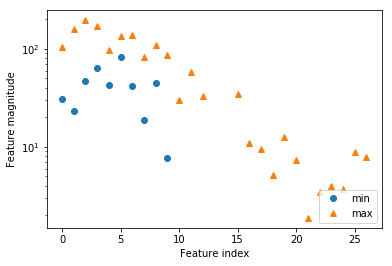

In [20]:
#Plots the min and max
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [21]:
#Change the scale to 0-1

# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training


In [22]:
# use THE SAME transformation on the test set,
# using min and range of the training set
X_test_scaled = (X_test - min_on_training) / range_on_training

Text(0,0.5,'Feature magnitude')

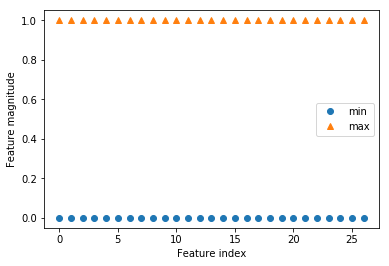

In [23]:
#Plots the new min and max
plt.figure()
plt.plot(X_train_scaled.min(axis=0), 'o', label="min")
plt.plot(X_train_scaled.max(axis=0), '^', label="max")
plt.legend(loc=5)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [24]:
#Evaluates the new scaled dataset
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.801
Accuracy on test set: 0.857


In [25]:
svc = SVC(C=100)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.923
Accuracy on test set: 0.943


In [26]:
svc = SVC(C=100, gamma=0.1)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.935
Accuracy on test set: 0.933


## 3. Create plotting function for Cross-validation & Training Score

In [27]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## 4. Obtain Cross-validation & Training Score 
Obtaining cross-validation with original dataset, using the C y gamma values found in the scaled Dataset

<module 'matplotlib.pyplot' from 'C:\\Users\\gollo\\Miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

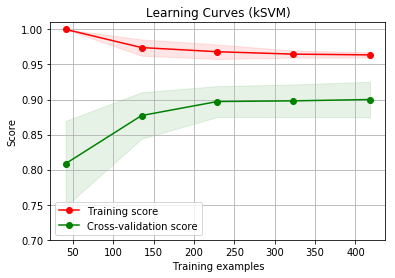

In [30]:
title = "Learning Curves (kSVM)"
# SVC is more expensive so we do a lower number of CV iterations:
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(C=100,gamma=0.0001)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

For more information about kNN classification, visit the following webpage:  http://scikit-learn.org/stable/modules/svm.html#kernel-functions